Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Dataset 

In [17]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\InternSavy\Task3-CustomerSegmentation\bank_transactions.csv')
df = df.sample(n=100000,random_state = 42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 892845 to 804143
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99671 non-null   object 
 3   CustGender               99899 non-null   object 
 4   CustLocation             99992 non-null   object 
 5   CustAccountBalance       99783 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [18]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0


In [21]:
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                329
CustGender                 101
CustLocation                 8
CustAccountBalance         217
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [22]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [23]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [24]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,99350,99350.00,99350,99350.00,99350.00
mean,1983-08-06 02:42:56.636134912,114448.56,2016-07-25 21:10:33.759436288,157151.06,1595.75
min,1800-01-01 00:00:00,0.00,2016-01-08 00:00:00,1.00,0.00
25%,1983-05-05 00:00:00,4740.49,2016-06-09 00:00:00,124105.25,165.00
50%,1988-08-12 00:00:00,16795.22,2016-08-20 00:00:00,164348.50,460.00
75%,1992-05-12 18:00:00,57144.82,2016-09-09 00:00:00,200104.75,1198.00
max,2072-12-31 00:00:00,115035495.10,2016-12-09 00:00:00,235958.00,600008.32
std,NaN,878115.09,NaN,51358.37,6302.30


In [25]:
cat_columns = ['CustGender', 'CustLocation']
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: CustGender
CustGender
M    72679
F    26671
Name: count, dtype: int64


Column: CustLocation
CustLocation
MUMBAI                         9746
NEW DELHI                      8028
BANGALORE                      7686
GURGAON                        7057
DELHI                          6661
                               ... 
LOTUS BUS STOP WORLI MUMBAI       1
JEEDI METLA  HYDERABAD            1
AIT                               1
AMBEDKAR STATUE HYDERABAD         1
EAST SINGBHUM                     1
Name: count, Length: 4327, dtype: int64




In [28]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index, axis=0)
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years=100)
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB']).dt.days / 365.25).round(0)
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


EDA

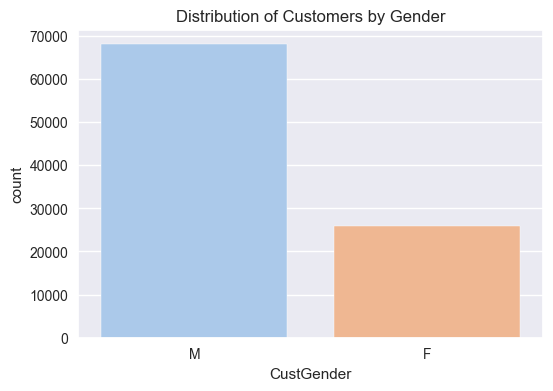

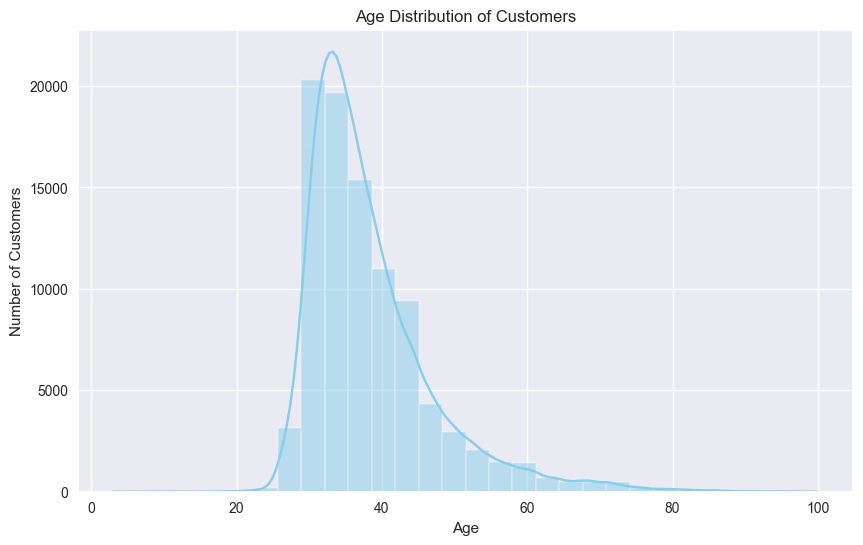

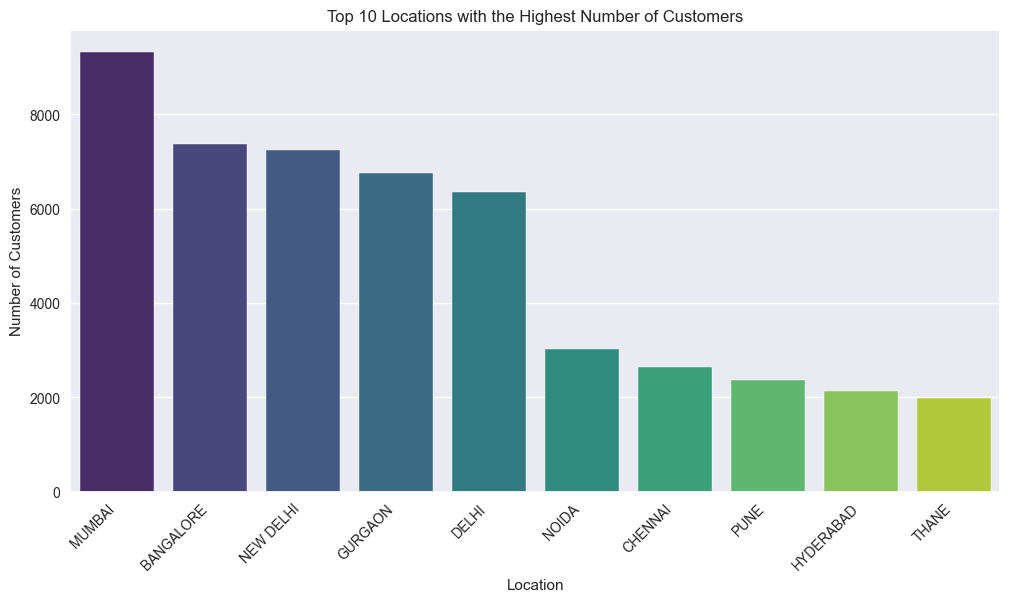

In [30]:
df1 = df.copy()
# 1. Distribution of customers by gender (CustGender)
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Distribution of Customers by Gender')
plt.show()

# 2. Age distribution of customers based on "CustomerDOB" column
plt.figure(figsize=(10, 6))
sns.histplot(df1['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 3. Location with the highest number of customers (CustLocation)
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()


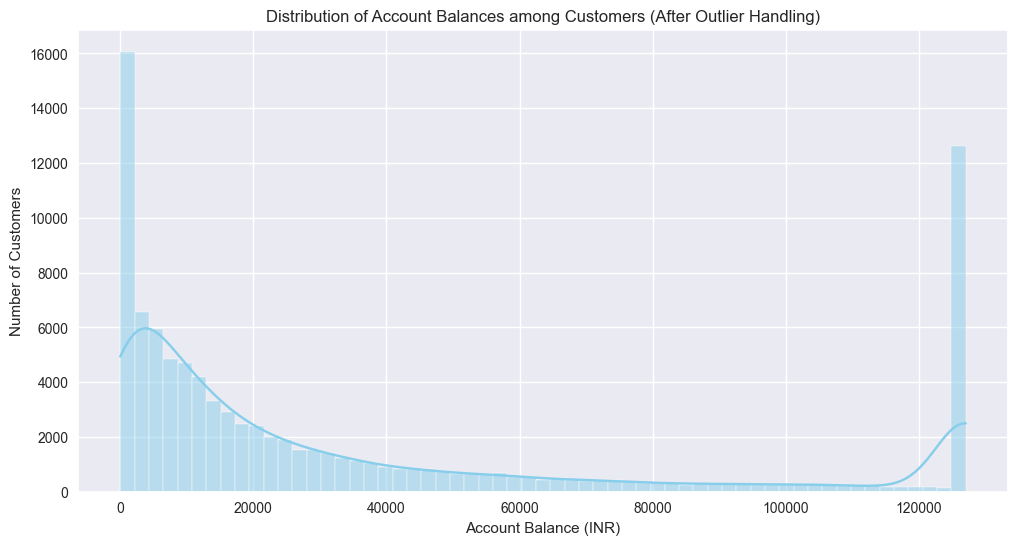

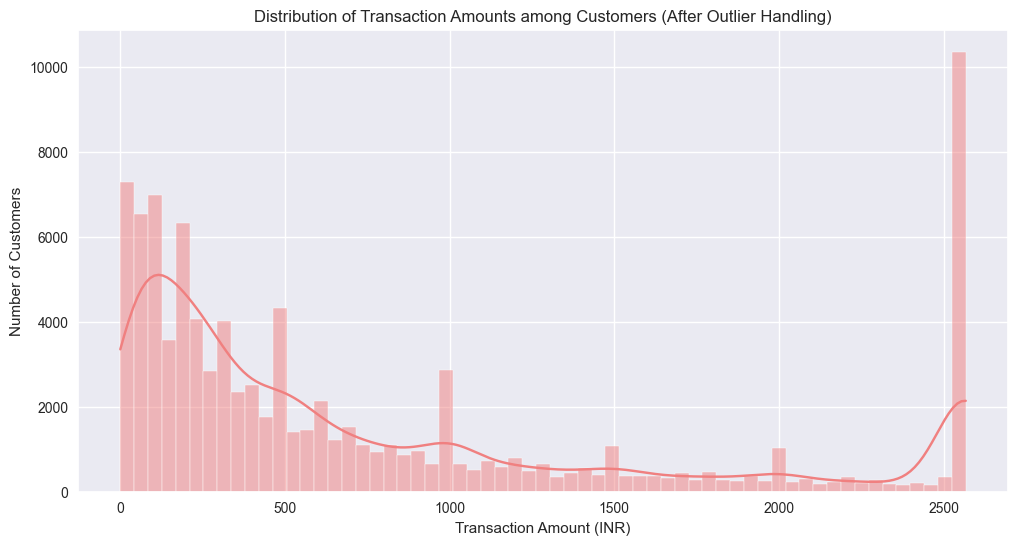

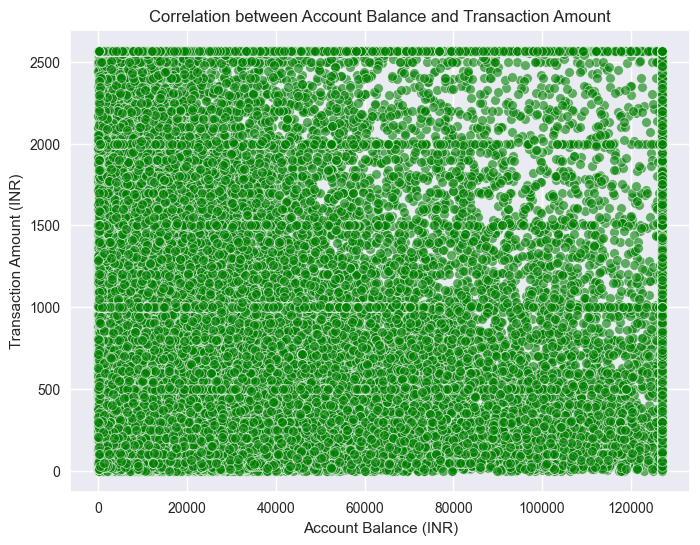

In [31]:
df2 = df1.copy()
# Outlier Handling using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

# Handling outliers for CustAccountBalance and TransactionAmount (INR) columns
df1 = handle_outliers_iqr(df1, 'CustAccountBalance')
df1 = handle_outliers_iqr(df1, 'TransactionAmount (INR)')

# Distribution of account balances (CustAccountBalance) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['CustAccountBalance'], kde=True, color='skyblue')
plt.title('Distribution of Account Balances among Customers (After Outlier Handling)')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of transaction amounts (TransactionAmount (INR)) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['TransactionAmount (INR)'], kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amounts among Customers (After Outlier Handling)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Correlation between customer account balance and transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df1, color='green', alpha=0.6)
plt.title('Correlation between Account Balance and Transaction Amount')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Transaction Amount (INR)')
plt.show()


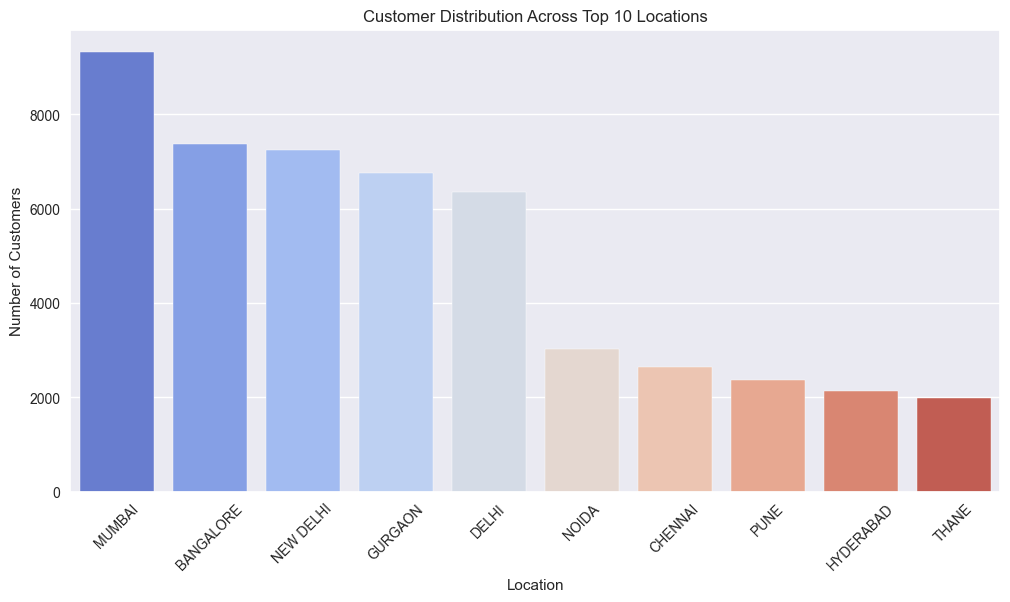

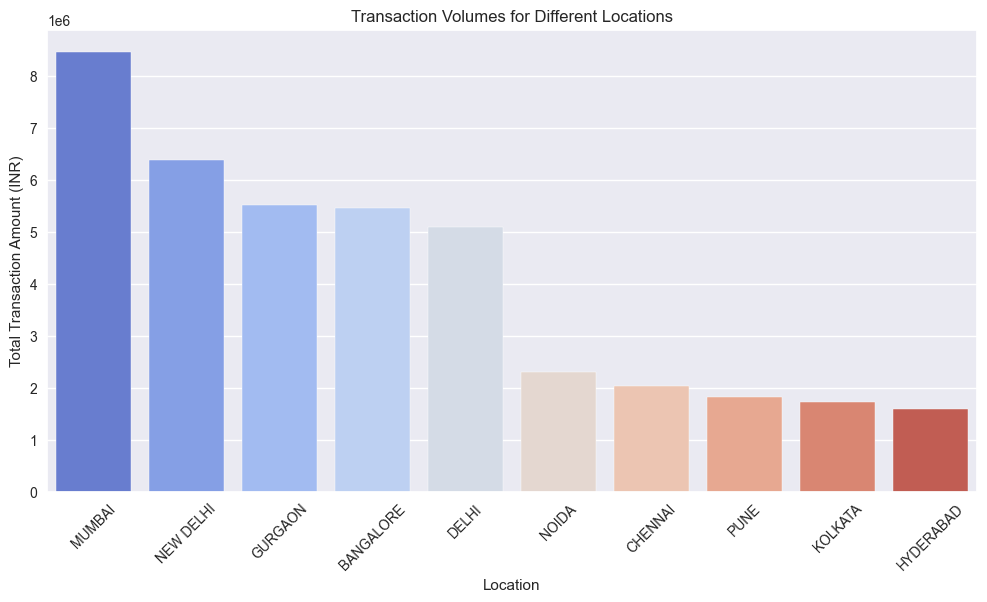

In [32]:
top_10_locations = df1['CustLocation'].value_counts().nlargest(10)

# Visualize customer distribution across top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='coolwarm')
plt.title('Customer Distribution Across Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


location_transaction_volumes = df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending = False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='coolwarm')
plt.title('Transaction Volumes for Different Locations')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

RFM Analysis

In [33]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])

current_date = df1['TransactionDate'].max()
rfm_data = df1.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

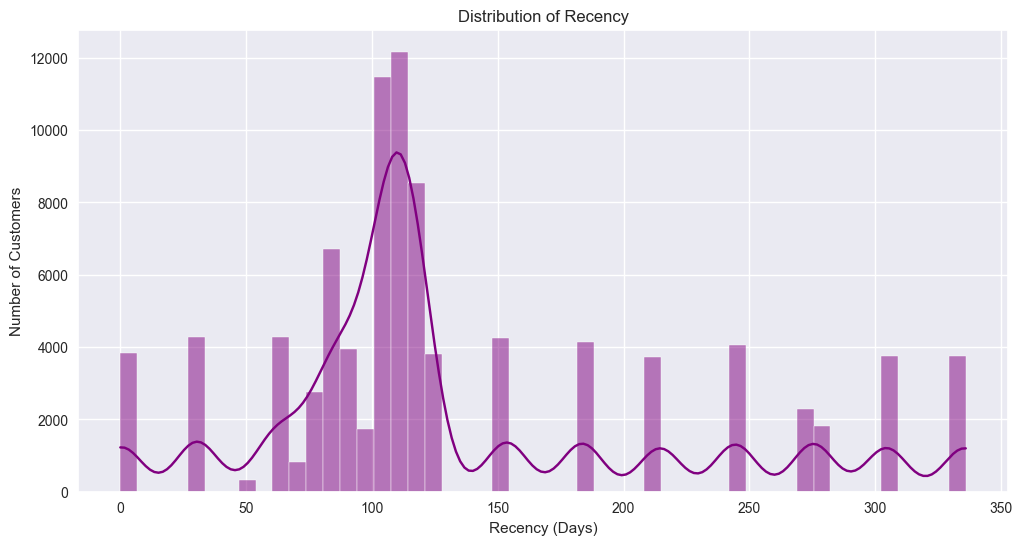

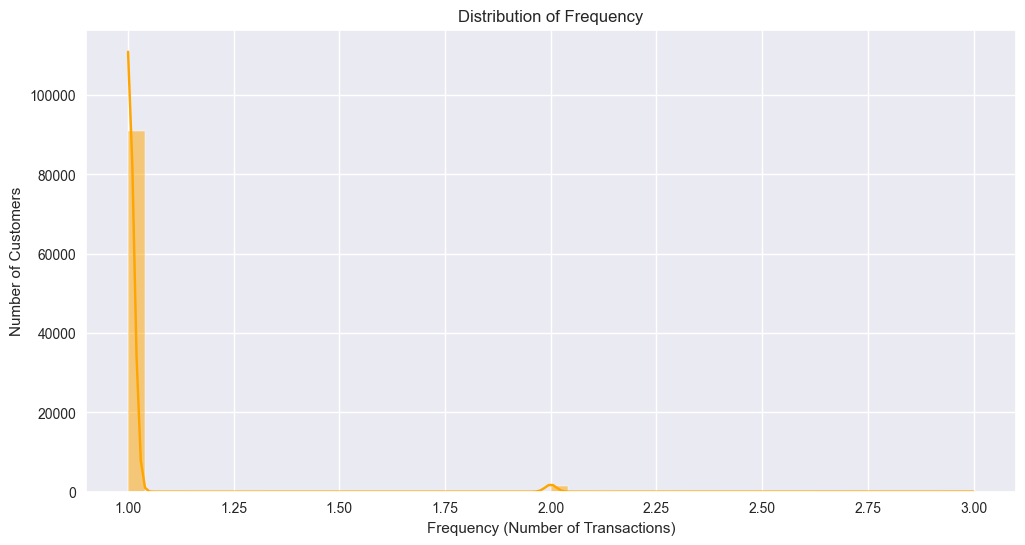

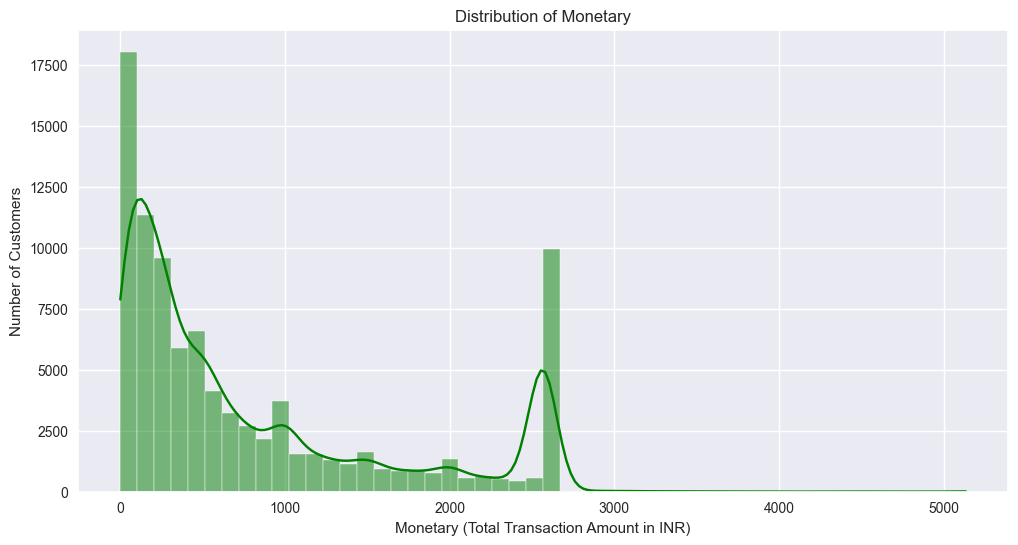

In [34]:
# Visualize the distributions of RFM features
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Frequency'], bins=50, kde=True, color='orange')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Monetary'], bins=50, kde=True, color='green')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total Transaction Amount in INR)')
plt.ylabel('Number of Customers')
plt.show()

Data Preprocessing

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
df2['CustGender']= le.fit_transform(df2['CustGender'])
df2['CustLocation']= le.fit_transform(df2['CustLocation'])
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,1,1524,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,1,1325,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,1,2437,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,1,1443,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,1,2801,9506.85,2016-09-14,90810,33.00,35.00


In [37]:
df2 = df2.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
892845,1,1524,84447.82,11858.00,39.00
444994,1,1325,12549.49,250.00,30.00
614896,1,2437,33607.65,3360.00,33.00
457036,1,1443,38238.86,250.00,33.00
997441,1,2801,9506.85,33.00,35.00


In [38]:
df2[df2['TransactionAmount (INR)'] == 0].count()
df2 = df2.drop(df2[df2['TransactionAmount (INR)'] == 0].index,axis = 0)

from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns_names)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0.62,-0.22,-0.02,1.79,0.07
1,0.62,-0.42,-0.11,-0.21,-0.95
2,0.62,0.70,-0.08,0.33,-0.61
3,0.62,-0.30,-0.08,-0.21,-0.61
4,0.62,1.07,-0.11,-0.25,-0.38


Data Modelling

In [39]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

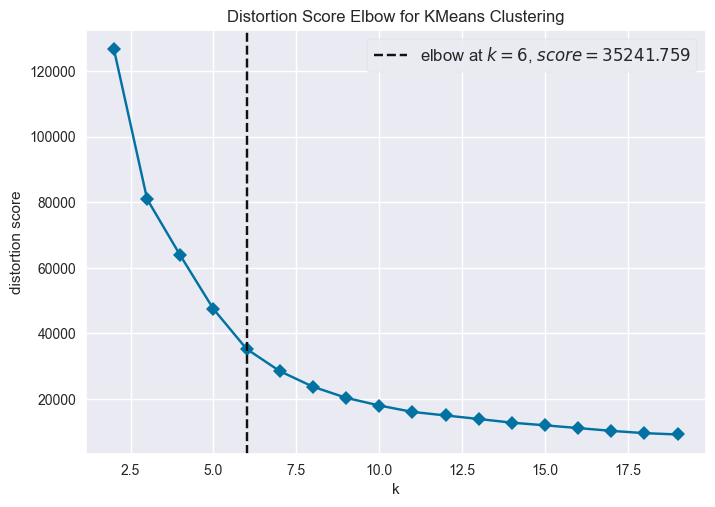

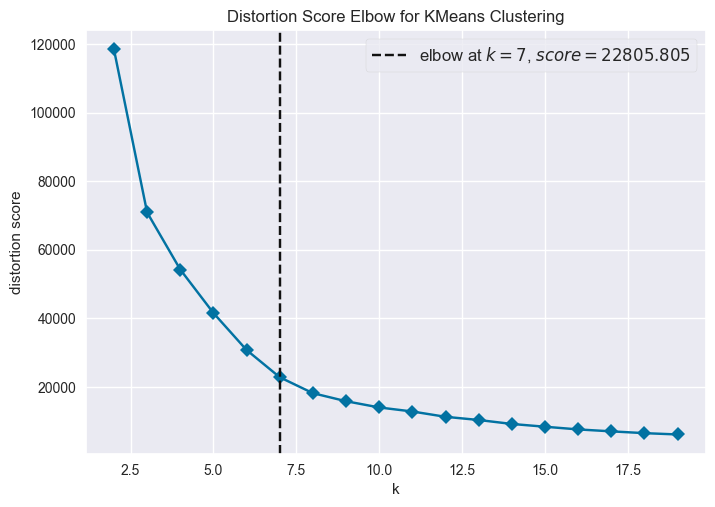

In [40]:
# Extract features from the DataFrame
X = df2[['CustomerAge', 'TransactionAmount (INR)']].values
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values

# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')
perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')

In [41]:
# Function to perform KMeans clustering and return the cluster labels and centroids
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=7)

# Add cluster labels to the DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,0.62,-0.22,-0.02,1.79,0.07,1,3,0.46,-0.04,-0.31,-0.08
1,0.62,-0.42,-0.11,-0.21,-0.95,0,3,-0.63,-0.12,-0.31,-0.08
2,0.62,0.70,-0.08,0.33,-0.61,0,1,-0.63,-0.12,0.66,-0.07
3,0.62,-0.30,-0.08,-0.21,-0.61,0,3,-0.63,-0.12,-0.31,-0.08
4,0.62,1.07,-0.11,-0.25,-0.38,0,1,-0.63,-0.12,0.66,-0.07


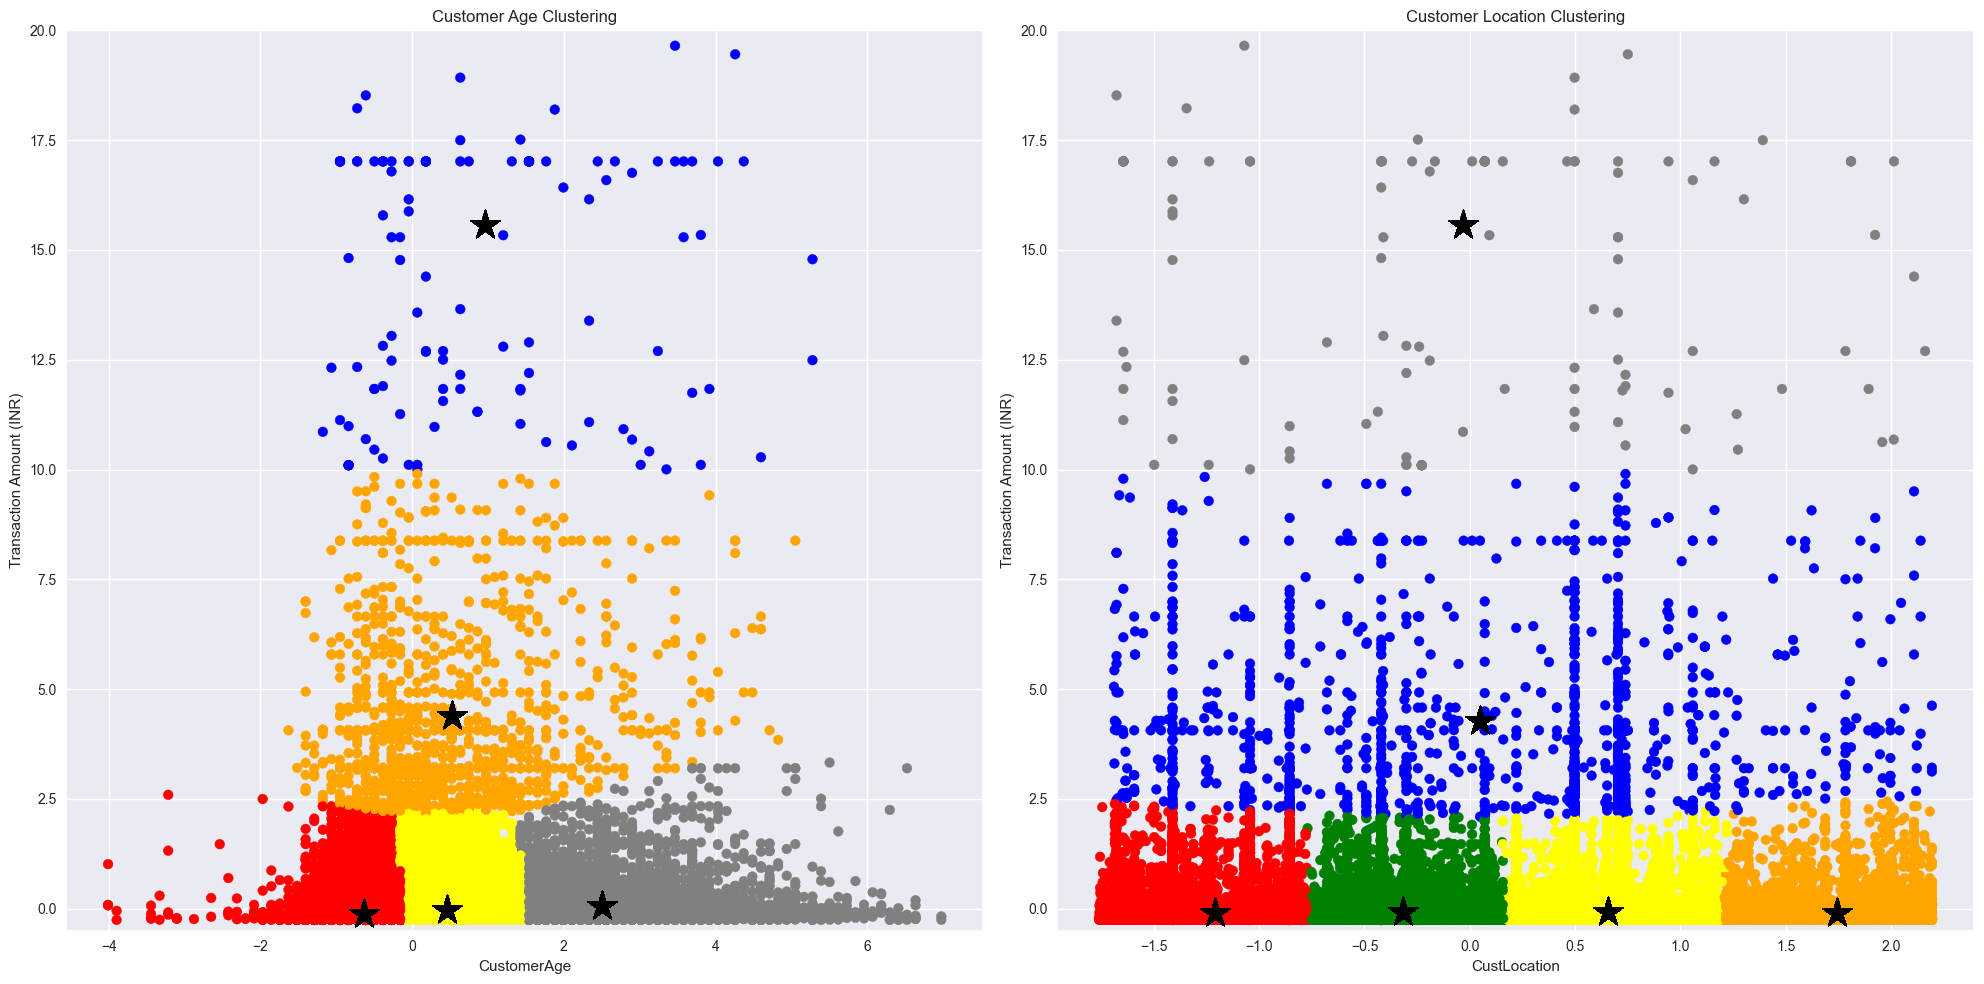

In [42]:
# Define colors for each cluster
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']

# Add cluster colors to the DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(6)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(7)})

# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['CustomerAge'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

Evaluation

In [43]:
from sklearn.metrics import silhouette_score

# Silhouette Score for cluster_age
silhouette_score_age = silhouette_score(df2[['TransactionAmount (INR)', 'CustomerAge']], df2['cluster_age'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

# Silhouette Score for cluster_location
silhouette_score_location = silhouette_score(df2[['CustLocation','TransactionAmount (INR)']], df2['cluster_location'])
print("Silhouette Score for cluster_location:", silhouette_score_location)

Silhouette Score for cluster_age: 0.5130674962936773
Silhouette Score for cluster_location: 0.5408747561241548
